In [8]:
%pip install seaborn tensorflow[and-cuda]


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

2025-11-02 15:57:05.393025: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-02 15:57:05.438779: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-02 15:57:06.560650: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Check if gpu is available


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

I0000 00:00:1762091827.834464   17366 gpu_device.cc:2020] Created device /device:GPU:0 with 1587 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Found GPU at: /device:GPU:0


# Load and Normalize Dataset


In [4]:
# Load the Fashion MNIST dataset from Keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize the images to the range [-1, 1]
train_images = (train_images.astype('float32') - 127.5) / 127.5
test_images = (test_images.astype('float32') - 127.5) / 127.5

# Define the class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)  # Output layer with 10 units for 10 classes
])

model.summary()

/home/hana/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1762091828.324295   17366 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1587 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# Loss and Optimizer


In [6]:
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training Loop



In [7]:
epochs = 4
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/4


2025-11-02 15:57:09.832123: I external/local_xla/xla/service/service.cc:163] XLA service 0x720ce8003ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-02 15:57:09.832140: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-11-02 15:57:09.847145: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-02 15:57:09.947509: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


 122/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6508 - loss: 1.0157

I0000 00:00:1762091830.875897   17459 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8267 - loss: 0.4715 - val_accuracy: 0.8413 - val_loss: 0.4423
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8666 - loss: 0.3655 - val_accuracy: 0.8615 - val_loss: 0.3846
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8761 - loss: 0.3322 - val_accuracy: 0.8661 - val_loss: 0.3690
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8845 - loss: 0.3076 - val_accuracy: 0.8729 - val_loss: 0.3614


# Plot Loss and Accuracy


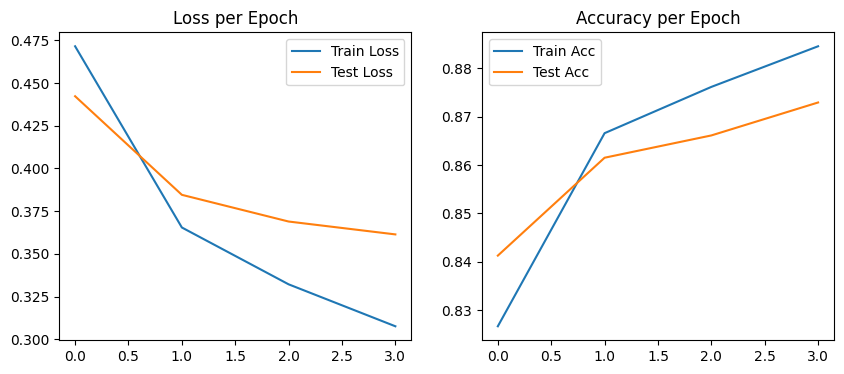

In [8]:
train_losses = history.history['loss']
test_losses = history.history['val_loss']
train_accuracies = history.history['accuracy']
test_accuracies = history.history['val_accuracy']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(test_accuracies, label='Test Acc')
plt.legend()
plt.title('Accuracy per Epoch')

plt.show()

# Confusion Matrix


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


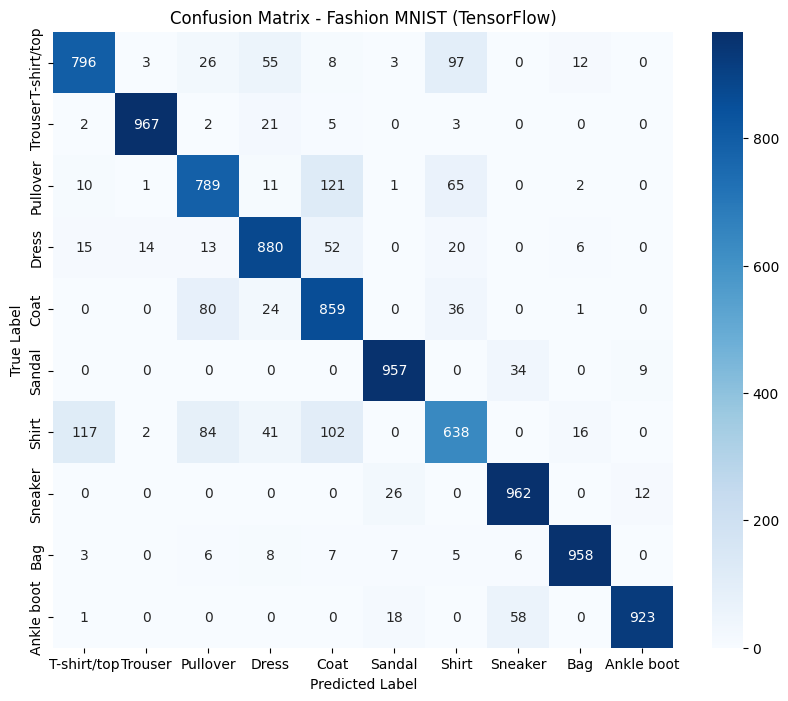

In [9]:
# Get model predictions
y_prob = model.predict(test_images)
y_pred = y_prob.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Fashion MNIST (TensorFlow)")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Show Predictions

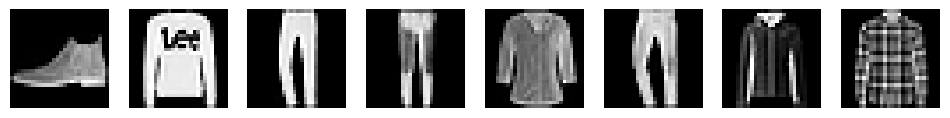

GroundTruth:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt
Predicted:    Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt


In [10]:
# Get a batch of test images and labels
images_to_show = test_images[:8]
labels_to_show = test_labels[:8]

# Get predictions for this batch
preds_to_show = y_pred[:8]

# Un-normalize images for display (from [-1, 1] back to [0, 1])
images_to_show = (images_to_show * 0.5) + 0.5

# Display the images
plt.figure(figsize=(12, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(images_to_show[i], cmap='gray')
    plt.axis('off')
plt.show()

print('GroundTruth: ', ' '.join(f'{classes[labels_to_show[j]]}' for j in range(8)))
print('Predicted:   ', ' '.join(f'{classes[preds_to_show[j]]}' for j in range(8)))

### The fully connected neural network successfully classified the Fashion-MNIST dataset, achieving a final test accuracy of 87.29%, which surpasses the 85% requirement. The training and validation accuracy curves show that the model learned effectively without significant overfitting over 4 epochs. Weight_decay=1e-4 was added in the Adam optimizer as a kind of regularization to help prevent overfitting.